In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', 100000)
pd.set_option('display.max_row', 1000000)
%matplotlib inline

In [2]:

%matplotlib inline
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import yellowbrick as yb
from yellowbrick.features import RadViz
from yellowbrick.model_selection import LearningCurve



import pylab as pl
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### AirBNB

Hypothesis - The more Reviews the higher the price the listings

# Read CSV to Pandas Dataframe

In [3]:
# Congress Soars to New Heights on Social Media - https://www.pewresearch.org/internet/2020/07/16/congress-soars-to-new-heights-on-social-media/
abnb_listing_bc =pd.read_csv('/Users/ellemafa/Downloads/listings.csv')

In [4]:
abnb_listing_bc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,21974,Comf. double room/private bathroom,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37973,2.17631,Private room,80,3,2,2017-11-06,0.05,3,134
1,23197,Forum DeLuxe 5 mins Walk To CCIB Center & Sea★,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,183,3,52,2019-12-15,0.44,2,320
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,98,2,63,2020-02-22,0.55,5,0
3,34241,Private Double room - Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37916,2.17535,Private room,46,30,8,2013-07-15,0.06,3,0
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,183,4,149,2020-03-11,1.20,3,67


### Drop Columns of No Use

In [5]:
abnb_listing_bc = abnb_listing_bc[['host_id', 'neighbourhood_group', 'price', 'room_type', 'number_of_reviews', 'reviews_per_month', 'availability_365']]

<AxesSubplot:>

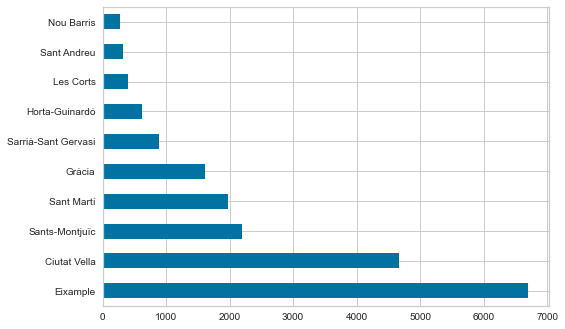

In [6]:
abnb_listing_bc.neighbourhood_group.value_counts().plot.barh()

<AxesSubplot:>

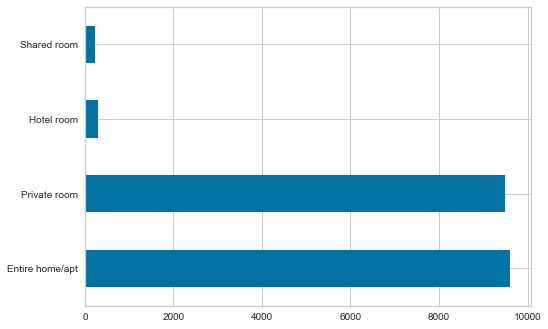

In [7]:
abnb_listing_bc.room_type.value_counts().plot.barh()

In [8]:
abnb_listing_bc.describe(include='all')

,host_id,neighbourhood_group,price,room_type,number_of_reviews,reviews_per_month,availability_365
count,1.964100e+04,19641,19641.000000,19641,19641.000000,13444.000000,19641.000000
unique,NaN,10,NaN,4,NaN,NaN,NaN
top,NaN,Eixample,NaN,Entire home/apt,NaN,NaN,NaN
freq,NaN,6695,NaN,9606,NaN,NaN,NaN
mean,1.143084e+08,NaN,91.907439,NaN,31.167252,1.014188,175.884273
std,1.151129e+08,NaN,238.073395,NaN,62.846293,1.168974,148.276121
min,3.073000e+03,NaN,0.000000,NaN,0.000000,0.010000,0.000000
25%,9.784103e+06,NaN,34.000000,NaN,0.000000,0.170000,1.000000
50%,6.416230e+07,NaN,55.000000,NaN,3.000000,0.550000,171.000000
75%,2.048187e+08,NaN,99.000000,NaN,32.000000,1.500000,349.000000


In [9]:
abnb_listing_bc.isna().sum()

host_id                   0
neighbourhood_group       0
price                     0
room_type                 0
number_of_reviews         0
reviews_per_month      6197
availability_365          0
dtype: int64

In [10]:
abnb_listing_bc['availability_365']

0        134
1        320
2          0
3          0
4         67
5        342
6        327
7        347
8        346
9        364
10       338
11       365
12       291
13       301
14       331
15       285
16       365
17       365
18       363
19       350
20       365
21         0
22       350
23       365
24       365
25         0
26       295
27       306
28         0
29       344
30         0
31         0
32        89
33        90
34       273
35       357
36       365
37       291
38       359
39        62
40       316
41       362
42       349
43       145
44       149
45       113
46       365
47       301
48       356
49       358
50         1
51         0
52       364
53        90
54       359
55         0
56       179
57       365
58         0
59       142
60         0
61       359
62         0
63        47
64         0
65       290
66       365
67         0
68       364
69       260
70       142
71       319
72        20
73         0
74       354
75       250
76       354

## Remove all rows within availability_365 column that == 0

In [11]:
abnb_listing_bc_365 = abnb_listing_bc[~(abnb_listing_bc.availability_365 == 0)]

In [12]:
abnb_listing_bc_365[abnb_listing_bc_365.availability_365 == '0']

,host_id,neighbourhood_group,price,room_type,number_of_reviews,reviews_per_month,availability_365


## Remove all rows within reviews_per_month column that are null

In [13]:
df = abnb_listing_bc_365.dropna()

In [14]:
len(df)

10088

In [15]:
abnb_listing_bc_365.isna().sum()

host_id                   0
neighbourhood_group       0
price                     0
room_type                 0
number_of_reviews         0
reviews_per_month      4747
availability_365          0
dtype: int64

In [16]:
df.head()

,host_id,neighbourhood_group,price,room_type,number_of_reviews,reviews_per_month,availability_365
0,73163,Ciutat Vella,80,Private room,2,0.05,134
1,90417,Sant Martí,183,Entire home/apt,52,0.44,320
4,73163,Ciutat Vella,183,Entire home/apt,149,1.20,67
5,152232,Eixample,15,Private room,322,3.02,342
6,152232,Eixample,12,Private room,271,2.33,327


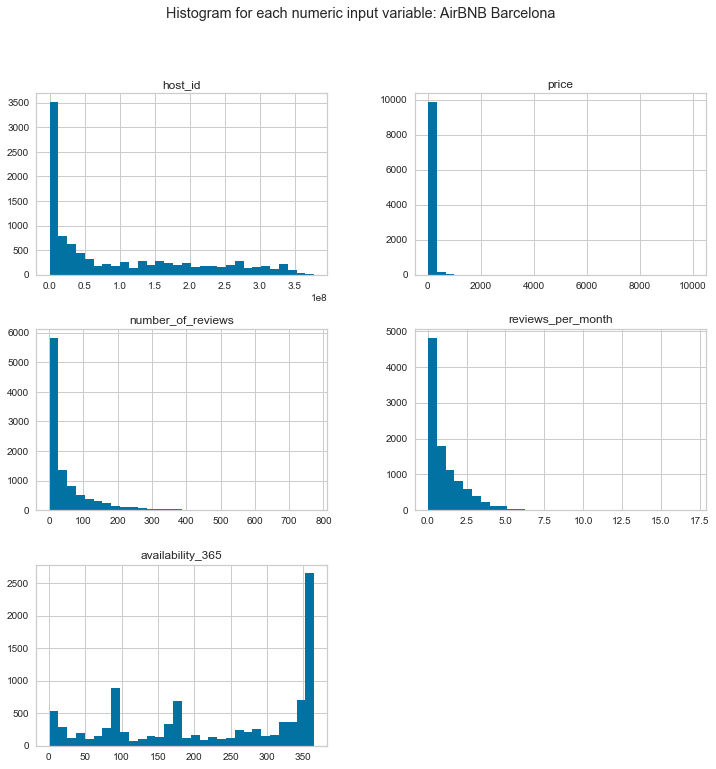

In [17]:
#historgram of all numerical data
df.hist(bins=30, figsize=(12,12))
pl.suptitle("Histogram for each numeric input variable: AirBNB Barcelona")
plt.show()

### Set X, y for deeper feature evaluation

In [18]:
df.columns

Index(['host_id', 'neighbourhood_group', 'price', 'room_type',
       'number_of_reviews', 'reviews_per_month', 'availability_365'],
      dtype='object')

In [19]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
df['neighbourhood_group']= le.fit_transform(df['neighbourhood_group']) 
df['room_type']= le.fit_transform(df['room_type'])

<ipython-input-19-e2e1b5946cbe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighbourhood_group']= le.fit_transform(df['neighbourhood_group'])
<ipython-input-19-e2e1b5946cbe>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['room_type']= le.fit_transform(df['room_type'])


In [20]:

#feature we will go with
feature_names = ['host_id', 'neighbourhood_group', 'room_type',
       'number_of_reviews', 'reviews_per_month', 'availability_365']
X = df[feature_names]
y = df['price']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [22]:
import statsmodels.api as sm
#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.135
Model:                            OLS   Adj. R-squared (uncentered):              0.134
Method:                 Least Squares   F-statistic:                              261.3
Date:                Sat, 09 Jan 2021   Prob (F-statistic):                   7.68e-312
Time:                        15:28:04   Log-Likelihood:                         -68673.
No. Observations:               10088   AIC:                                  1.374e+05
Df Residuals:                   10082   BIC:                                  1.374e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [23]:
from yellowbrick.classifier import ConfusionMatrix, ROCAUC, PrecisionRecallCurve, ClassificationReport

In [25]:
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

In [28]:
cr = ClassificationReport(linear_regressor, classes=classes, support=True)
cr.fit(X_train, y_train)
cr.score(X_test, y_test)
cr.show()

YellowbrickTypeError: This estimator is not a classifier; try a regression or clustering score visualizer instead!